In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ols
import numpy as np
import matplotlib.pyplot as plt

In [11]:
n = 2000
p = 1000
seed = 123

np.random.seed(seed)
X = np.random.normal(size=(n,p))
beta = np.random.uniform(-1, 1, p) * np.random.binomial(1, 0.2, p)
y = X @ beta + np.random.normal(size=n)

In [12]:
Q, R = np.linalg.qr(X, 'reduced')
beta_hat = np.linalg.solve(R, Q.T @ y)

In [28]:
ols_pbcd_out = ols.ols_pbcd(X, y, tol=1e-10)
ols_pbcd_out[2:]

(Array(5.820766e-11, dtype=float32), Array(3, dtype=int32, weak_type=True))

In [6]:
ols_epbcd_out = ols.ols_epbcd(X, y, n_batches=16, tol=1e-10)
ols_epbcd_out[2:]

128.9053193012873
93.94817658091586
13.709516509373984
3.8047081748644516
1.2978295403222242
0.453170508891344
0.16640320591007668
0.06130120201657215
0.023133590875659138
0.008788350014947354
0.0033909019810380416
0.00131997071778945
0.000519980978545694
0.00020674840367670793
8.302034217801216e-05
3.3625657185136027e-05
1.3732865685748644e-05
5.650779553434403e-06
2.3411840487597143e-06
9.760827538229932e-07
4.0919727410937413e-07
1.7240953908981282e-07
7.297162847308413e-08
3.0991228576008704e-08
1.3210613358793921e-08
5.653060493789515e-09
2.4235852787620377e-09
1.0423698228641716e-09
4.5113761083330016e-10
1.9592072859897501e-10
8.52913792255087e-11


(8.52913792255087e-11, 31)

In [29]:
ols_bcd_out = ols.ols_bcd(X, y, tol=1e-10)
ols_bcd_out[2:]

(9.33264157952659e-11, 54)

In [8]:
np.linalg.norm(y-X@ols_bcd_out[0]), np.linalg.norm(y-X@ols_pbcd_out[0]), np.linalg.norm(y-X@ols_epbcd_out[0])

(29.337062029958496, 29.33706, 29.337062029986733)

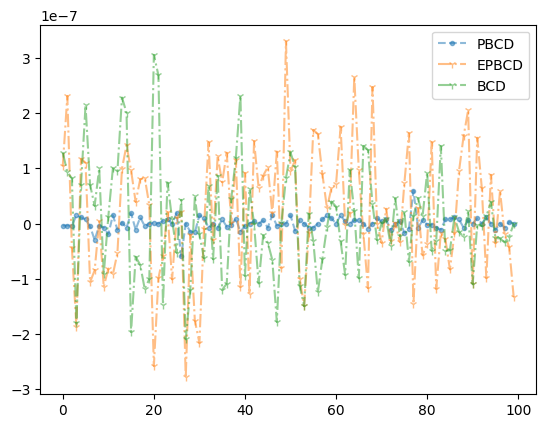

In [9]:
plt.plot(ols_pbcd_out[0]-beta_hat, label='PBCD', linestyle='--',  marker='.', alpha=0.5)
plt.plot(ols_epbcd_out[0]-beta_hat, label='EPBCD', linestyle='-.', marker='1', alpha=0.5)
plt.plot(ols_bcd_out[0]-beta_hat, label='BCD', linestyle='-.',  marker='1', alpha=0.5)
#plt.plot(beta_hat, label='Truth', linestyle='-', color='red', marker='v', alpha=0.5)
plt.legend()
plt.show()